In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR = './data'
SAVE_DIR = './data'
index = {'road': 7, 'car': 10, 'roadlane':6}

In [14]:
image_dir= os.path.join(DATA_DIR,'Test_org/CameraRGB')
label_dir = os.path.join(DATA_DIR,'Test_org/CameraSeg')
image_paths = glob(os.path.join(image_dir, '*.png'))
label_paths = {os.path.basename(path): path for path in glob(os.path.join(label_dir, '*.png'))}

In [15]:
images = []
labels = []
image_files = []
for image_file in image_paths[:100]:
  image = skimage.io.imread(image_file)
  label = skimage.io.imread(label_paths[os.path.basename(image_file)])
  images.append(image)
  labels.append(label)
  image_files.append(image_file)
images = np.array(images)
labels = np.array(labels)

## Display Images and Labels

./data/Test_org/CameraRGB/ACA022_0180.png


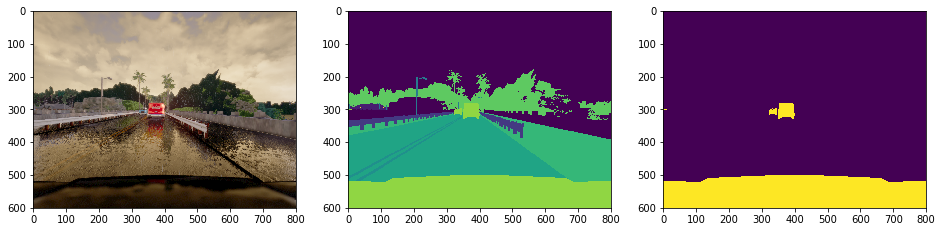

In [16]:
import random
idx = random.randint(0,images.shape[0]-1)
print(image_files[idx])
plt.subplot(131)
plt.imshow(images[idx])
plt.subplot(132)
plt.imshow(labels[idx][:,:,0])
plt.subplot(133)
plt.imshow(np.equal(labels[idx][:,:,0],index['car']))
plt.gcf().set_size_inches(16,16)

## Display Cropped Images and Labels

./data/Test_org/CameraRGB/ACA078_0120.png


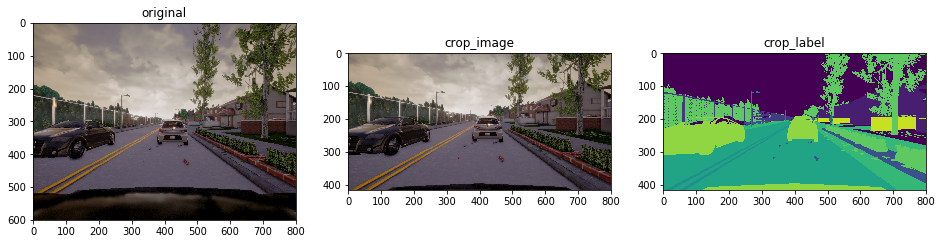

In [35]:
idx = random.randint(0,images.shape[0]-1)
image_crop = images[idx][102:518,:,:]
label_crop = labels[idx][102:518,:,0]
print(image_files[idx])
plt.subplot(131)
plt.title('original')
plt.imshow(images[idx])
plt.subplot(132)
plt.title('crop_image')
plt.imshow(image_crop)
plt.subplot(133)
plt.title('crop_label')
plt.imshow(label_crop)
plt.gcf().set_size_inches(16,16)

## Manipulate Labels

Remap the label to: background:0; car:1, road:2

In [18]:
label_org = labels[idx]
label = np.zeros_like(label_org)
label_org_layer = label_org[:,:,0]

In [19]:
label[:,:,0][(label_org_layer != 7) * (label_org_layer != 10)  * (label_org_layer != 6)] = 1
label[:,:,1][label_org_layer == index['car']] = 1
label[:,:,2][np.logical_or(label_org_layer == index['road'],label_org_layer == index['roadlane'])] = 1

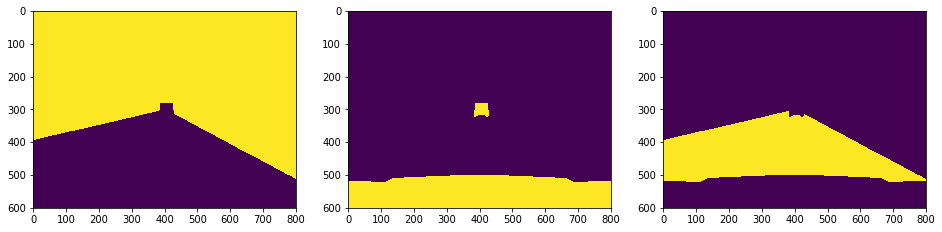

In [20]:
plt.subplot(131)
plt.imshow(np.equal(label[:,:,0], 1))
plt.subplot(132)
plt.imshow(np.equal(label[:,:,1], 1))
plt.subplot(133)
plt.imshow(np.equal(label[:,:,2], 1))
plt.gcf().set_size_inches(16,16)

## Save Relabeled image

In [23]:
crop_dim1 = 102
crop_dim2 = 518
save_image_dir = os.path.join(SAVE_DIR,'Test/CameraRGB')
save_label_dir = os.path.join(SAVE_DIR,'Test/CameraSeg')
image_dir= os.path.join(DATA_DIR,'Test_org/CameraRGB')
label_dir = os.path.join(DATA_DIR,'Test_org/CameraSeg')

image_paths = glob(os.path.join(image_dir, '*.png'))
label_paths = {os.path.basename(path): path for path in glob(os.path.join(label_dir, '*.png'))}

In [24]:
i = 1
for image_file in image_paths:
  image = skimage.io.imread(image_file)
  label = skimage.io.imread(label_paths[os.path.basename(image_file)])
  image_crop = image
  label_crop = label
  label_label = label_crop[:,:,0]
  label_cpy = np.zeros_like(label_crop)
  
  label_cpy[:,:,0][(label_label != 7) * (label_label != 10)  * (label_label != 6)] = 1 
  label_cpy[:,:,1][label_label == index['car']] = 1 
  label_cpy[498:,:,0][label_cpy[498:,:,1]==1] = 1
  label_cpy[498:,:,1] = 0
  label_cpy[:,:,2][np.logical_or(label_label == index['road'],label_label == index['roadlane'])] = 1
  skimage.io.imsave(os.path.join(save_image_dir,os.path.basename(image_file)), image_crop[crop_dim1:crop_dim2])
  skimage.io.imsave(os.path.join(save_label_dir,os.path.basename(image_file)), label_cpy[crop_dim1:crop_dim2])
  print("processing {}/{}: {}".format(i,len(image_paths),image_file),end='\r')
  i +=1

## Observe image spatial distribution

In [28]:
re_image_dir= os.path.join('/home/gexd7127/git/Udacity/CarND-Lyft-Challenge/data','Train/CameraRGB')
re_label_dir = os.path.join('/home/gexd7127/git/Udacity/CarND-Lyft-Challenge/data','Train/CameraSeg')

re_image_paths = glob(os.path.join(re_image_dir, '*.png'))
re_label_paths = {os.path.basename(path): path for path in glob(os.path.join(re_label_dir, '*.png'))}
base_car_labels = np.zeros([600,800],dtype = np.int)
base_road_labels = np.zeros([600,800],dtype = np.int)
i = 1 
outliers = []
for re_image_file in re_image_paths:
  re_image = skimage.io.imread(re_image_file)
  re_label = skimage.io.imread(re_label_paths[os.path.basename(re_image_file)])
  car_label = np.where(re_label[:,:,0]==10,1,0)
  road_label = np.where(re_label[:,:,0]==7,1,0)
  base_car_labels += car_label
  base_road_labels += road_label
  if np.sum(car_label) != 0:
    if np.min(np.where(car_label==1)[0]) < 200:
      outliers.append(re_image)
  i +=1
  print("processing {}/{}: {}".format(i,len(re_image_paths),re_image_file),end='\r')

### Print outlier images

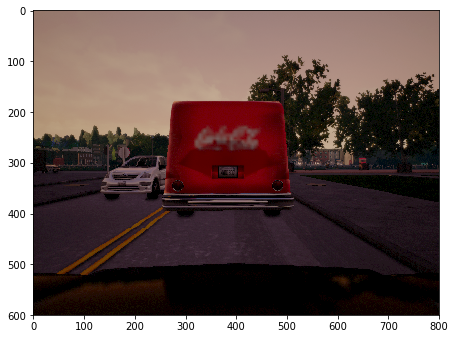

In [30]:
plt.subplot(121)
plt.imshow(outliers[0])
plt.gcf().set_size_inches(16,16)

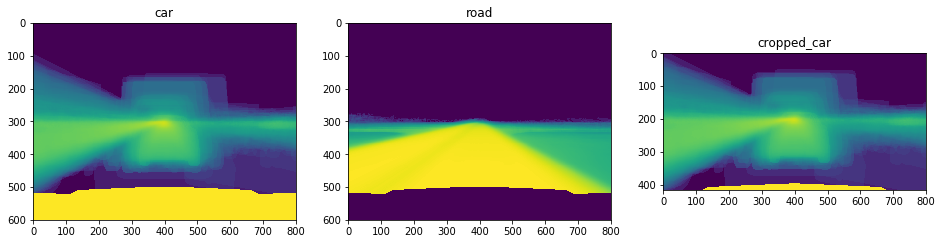

In [34]:
plt.subplot(131)
plt.title('car')
plt.imshow(np.log(base_car_labels+1))
plt.subplot(132)
plt.title('road')
plt.imshow(np.log(base_road_labels+1))
plt.subplot(133)
plt.title('cropped_car')
plt.imshow(np.log(base_car_labels[102:518]+1))
plt.gcf().set_size_inches(16,8)

## Test and Reload images 

In [36]:
re_image_dir= os.path.join(SAVE_DIR,'Test/CameraRGB')
re_label_dir = os.path.join(SAVE_DIR,'Test/CameraSeg')
re_image_paths = glob(os.path.join(re_image_dir, '*.png'))
re_label_paths = {os.path.basename(path): path for path in glob(os.path.join(re_label_dir, '*.png'))}

In [39]:
print('image_size: {}, label_size: {}'.format(len(re_image_paths),len(re_label_paths)))

image_size: 1000, label_size: 1000


In [40]:
re_images = []
re_labels = []
re_image_files = []
for re_image_file in re_image_paths[:200]:
  re_image = skimage.io.imread(re_image_file)
  re_label = skimage.io.imread(re_label_paths[os.path.basename(re_image_file)])
  re_images.append(re_image)
  re_labels.append(re_label)
  re_image_files.append(re_image_file)

./data/Test/CameraRGB/ACA087_0180.png


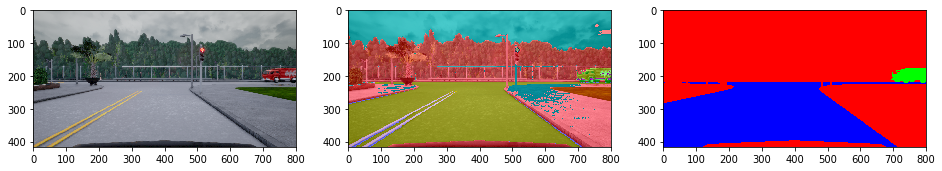

In [41]:
idx = random.randint(0,len(re_images)-1)
print(re_image_files[idx])
plt.subplot(131)
plt.imshow(re_images[idx])
plt.subplot(132)
plt.imshow(re_images[idx]+re_labels[idx]*128)
plt.subplot(133)
plt.imshow(re_labels[idx]*255)
plt.gcf().set_size_inches(16,8)